In [1]:
# Importing necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis
pd.set_option('display.max_columns', None)  # Configure pandas to display all columns in DataFrames
import warnings  # Import the warnings library

# Ignore all warnings to make the output cleaner
warnings.filterwarnings('ignore')

# Your pandas code for data manipulation and analysis would go here

# Define the path to the Excel file you want to analyze
file_path = 'analytics_test.xlsx'

# Load the Excel file to access its sheets and metadata
xls = pd.ExcelFile(file_path)  # Create an ExcelFile object
sheet_names = xls.sheet_names  # Extract the names of all sheets within the Excel file

# The variable 'sheet_names' now contains a list of all sheet names in the Excel workbook
# You can print 'sheet_names' to see the list of sheets
# print(sheet_names)


In [2]:
# Load the 'car_sales' sheet from the Excel workbook into a DataFrame
# This reads the data from the 'car_sales' sheet into a pandas DataFrame named 'car_sales'
car_sales = pd.read_excel(xls, sheet_name='car_sales')

# Load the 'car_details' sheet from the Excel workbook into a DataFrame
# Similar to the previous line, this reads the 'car_details' sheet into a DataFrame named 'car_details'
car_details = pd.read_excel(xls, sheet_name='car_details')

# Load the 'car_claims' sheet from the Excel workbook into a DataFrame
# This line reads the 'car_claims' sheet into a DataFrame named 'car_claims'
car_claims = pd.read_excel(xls, sheet_name='car_claims')

In [3]:
car_sales = car_sales[['car_id_sales','country','sell_price']]
car_sales = car_sales.drop_duplicates()
car_details = car_details.drop_duplicates()
car_claims = car_claims.drop_duplicates()

In [4]:
# Rename 'car_id' columns for consistency
car_sales.rename(columns={'car_id_sales': 'car_id'}, inplace=True)
car_details.rename(columns={'car_id_details': 'car_id'}, inplace=True)
car_claims.rename(columns={'car_id_claims': 'car_id'}, inplace=True)

# Perform the joins
# First, join car_sales with car_details
sales_details = pd.merge(car_sales, car_details, on='car_id', how='left')

# Then, join the result with car_claims
full_data = pd.merge(sales_details, car_claims, on='car_id', how='left')
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71512 entries, 0 to 71511
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             71512 non-null  int64  
 1   country            71512 non-null  object 
 2   sell_price         71512 non-null  int64  
 3   has_tuning         71512 non-null  int64  
 4   has_airbags        71512 non-null  int64  
 5   has_alarm_system   71512 non-null  int64  
 6   fuel_type          71512 non-null  int64  
 7   gear_type          71512 non-null  int64  
 8   ac_type            71512 non-null  int64  
 9   xenon_light        71512 non-null  int64  
 10  navigation_system  71512 non-null  int64  
 11  radio_system       44593 non-null  float64
 12  claim_number       20982 non-null  object 
 13  full_refunds       71512 non-null  int64  
 14  partial_refunds    71512 non-null  int64  
 15  voucher_amount     15803 non-null  float64
 16  claim_status       209

,car_id,country,sell_price,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,3421775349,ES,1098,1,1,0,1039,1138,1050,0,0,3534.0,NaN,0,0,NaN,NaN
1,5316743932,DE,435,0,1,0,1040,1138,0,0,0,NaN,NaN,0,0,NaN,NaN
2,5785159431,FR,11028,0,1,1,1040,1138,1050,0,1100,3534.0,NaN,0,0,NaN,NaN
3,7008763171,DE,21100,0,1,0,1040,1141,1050,0,1100,3534.0,NaN,0,0,NaN,NaN
4,1417558732,DE,1943,0,1,0,1040,1138,1049,0,0,NaN,NaN,0,0,NaN,NaN


In [5]:
full_data.columns

Index(['car_id', 'country', 'sell_price', 'has_tuning', 'has_airbags',
       'has_alarm_system', 'fuel_type', 'gear_type', 'ac_type', 'xenon_light',
       'navigation_system', 'radio_system', 'claim_number', 'full_refunds',
       'partial_refunds', 'voucher_amount', 'claim_status'],
      dtype='object')

In [6]:
from datetime import datetime
data_no_duplicates = full_data.copy()
# Handle Missing Values
# data_no_duplicates['merchant_id'].fillna(-1, inplace=True)
# data_no_duplicates['transport_date'].fillna('Not Applicable', inplace=True)
data_no_duplicates['radio_system'].fillna(-1, inplace=True)
data_no_duplicates['claim_number'].fillna('No Claim', inplace=True)
data_no_duplicates['voucher_amount'].fillna(0, inplace=True)  # Assuming 0 for no voucher issued
data_no_duplicates['claim_status'].fillna('No Claim', inplace=True)


# Ensure Boolean Columns
boolean_columns = ['has_tuning', 'has_airbags', 'has_alarm_system', 'xenon_light', 'navigation_system', 'full_refunds', 'partial_refunds']
for col in boolean_columns:
    data_no_duplicates[col] = data_no_duplicates[col].astype(bool)

# Convert to Categorical Variables
categorical_columns = ['country', 'fuel_type', 'gear_type', 'ac_type']
for col in categorical_columns:
    data_no_duplicates[col] = data_no_duplicates[col].astype('category')

# Check the data after preprocessing
data_no_duplicates.info()

# The dataset is now preprocessed and ready for analysis and visualization.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71512 entries, 0 to 71511
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   car_id             71512 non-null  int64   
 1   country            71512 non-null  category
 2   sell_price         71512 non-null  int64   
 3   has_tuning         71512 non-null  bool    
 4   has_airbags        71512 non-null  bool    
 5   has_alarm_system   71512 non-null  bool    
 6   fuel_type          71512 non-null  category
 7   gear_type          71512 non-null  category
 8   ac_type            71512 non-null  category
 9   xenon_light        71512 non-null  bool    
 10  navigation_system  71512 non-null  bool    
 11  radio_system       71512 non-null  float64 
 12  claim_number       71512 non-null  object  
 13  full_refunds       71512 non-null  bool    
 14  partial_refunds    71512 non-null  bool    
 15  voucher_amount     71512 non-null  float64 
 16  clai

In [7]:
data_no_duplicates['claim_status'].unique()

array(['No Claim', 'CLOSED_FULLY_PROCESSED', 'REJECTED',
       'CLOSED_NO_COMPENSATION',
       'CLOSED_WAITING_FOR_MERCHANT_BANK_DETAILS', 'MORE_PROOF_RECEIVED',
       'WAITING_FOR_LOCAL_OPS_MD_DECISION', 'CREATED',
       'CLOSED_WAITING_FOR_MORE_PROOF', 'CLOSED_ITEMS_FOUND_AND_SENT',
       'CLOSED_CARRIER_WILL_COMPENSATE',
       'WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT',
       'PROOF_NOT_RECEIVED',
       '2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT',
       'MISSING_ITEMS_IN_PROGRESS',
       'WAITING_FOR_CLAIMS_TEAM_1_EVALUATION', 'NEW',
       'WAITING_FOR_CLAIMS_TEAM_2_EVALUATION', 'CLOSED_OVER_TIME_LIMIT',
       '2ND_DECISION_WAITING_FOR_LOCAL_OPS_MD_DECISION',
       'CLOSED_WAITING_FOR_DOCUMENTS',
       'CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COMPENSATION_TO_BE_RECORDED',
       'CLOSED_WAITING_FOR_CAR_DOCUMENTS_AND_BANK_DETAILS',
       'NEW_MISSING_ITEM_CLAIM', 'WAITING_FOR_CARRIER_FEEDBACK',
       'WAITING_FOR_LEGAL_TEAM', '2ND_EVALUATION

In [8]:
# Convert boolean features to string for visualization purposes
features_to_convert = ['navigation_system', 'has_airbags', 'has_tuning']
for feature in features_to_convert:
    data_no_duplicates[feature + '_str'] = data_no_duplicates[feature].map({True: 'Yes', False: 'No'})

In [9]:
# Convert boolean features to string for visualization purposes
features_to_convert = ['navigation_system', 'has_airbags', 'has_tuning']
for feature in features_to_convert:
    data_no_duplicates[feature + '_str'] = data_no_duplicates[feature].map({True: 'Yes', False: 'No'})


In [10]:
# Convert 'fuel_type' to string to ensure it's treated as categorical data
data_no_duplicates['fuel_type_str'] = data_no_duplicates['fuel_type'].astype(str)

# Convert boolean columns to string for visualization purposes
data_no_duplicates['full_refunds_str'] = data_no_duplicates['full_refunds'].map({True: 'Full Refund', False: 'No Full Refund'})
data_no_duplicates['partial_refunds_str'] = data_no_duplicates['partial_refunds'].map({True: 'Partial Refund', False: 'No Partial Refund'})


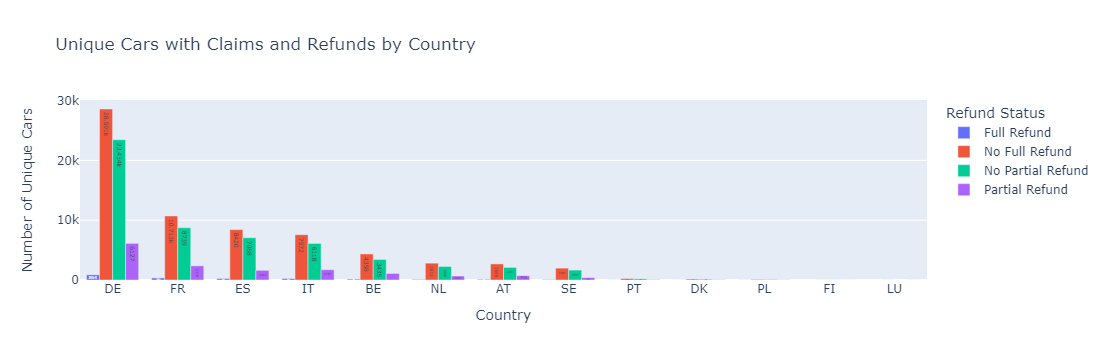

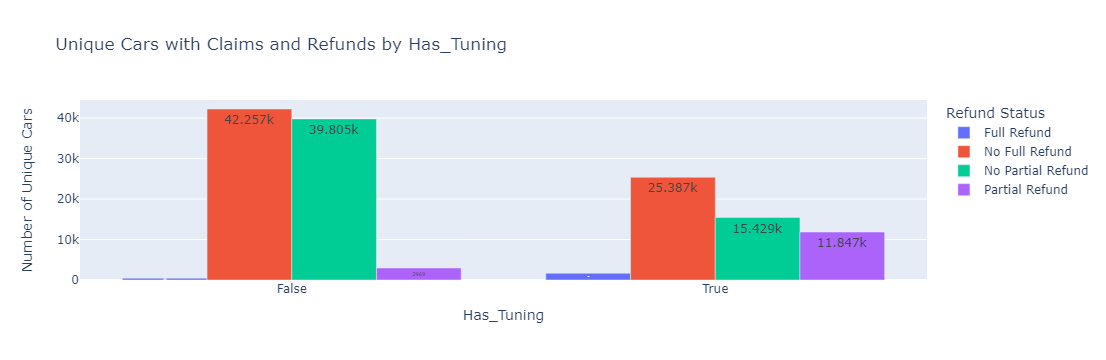

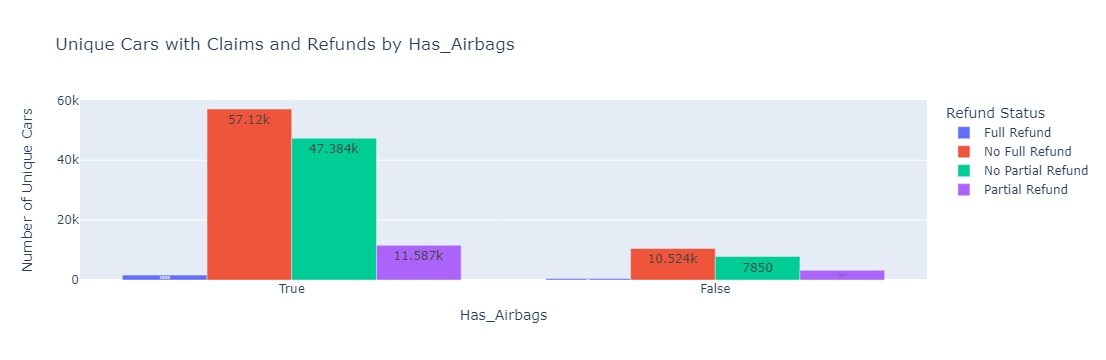

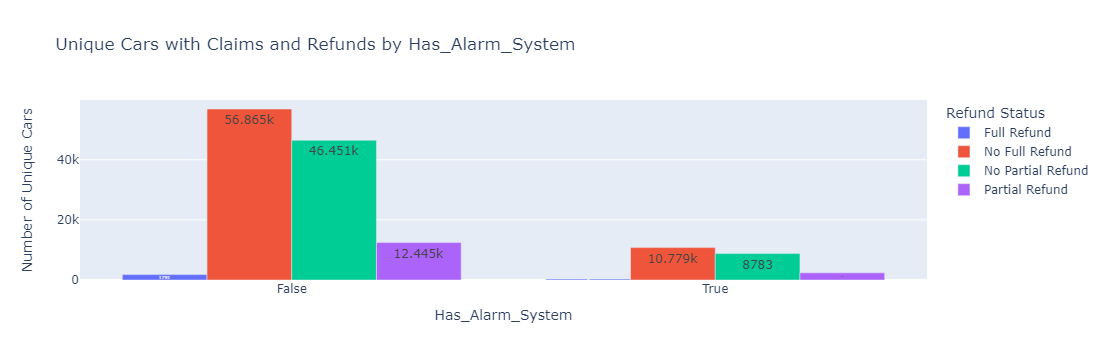

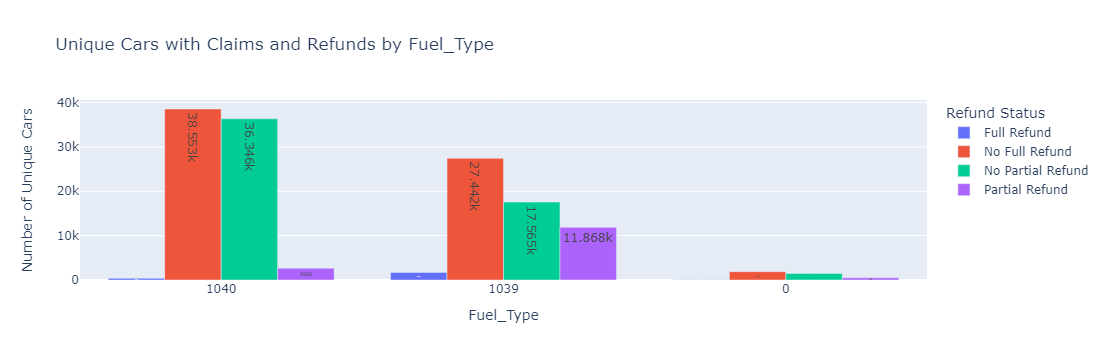

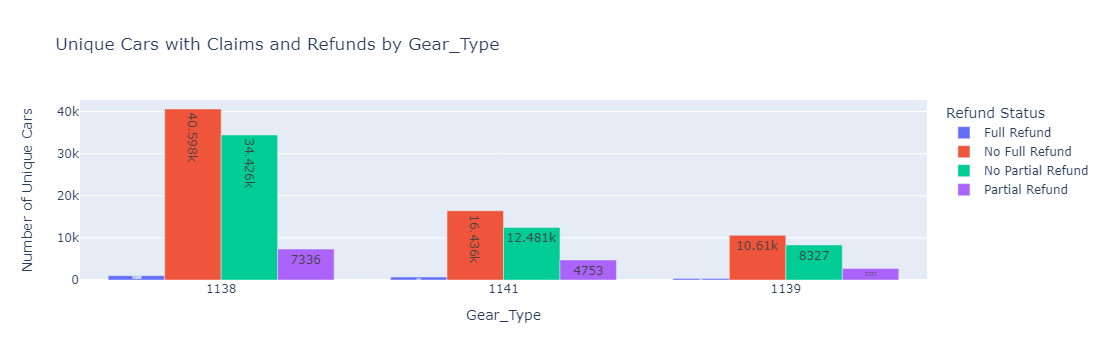

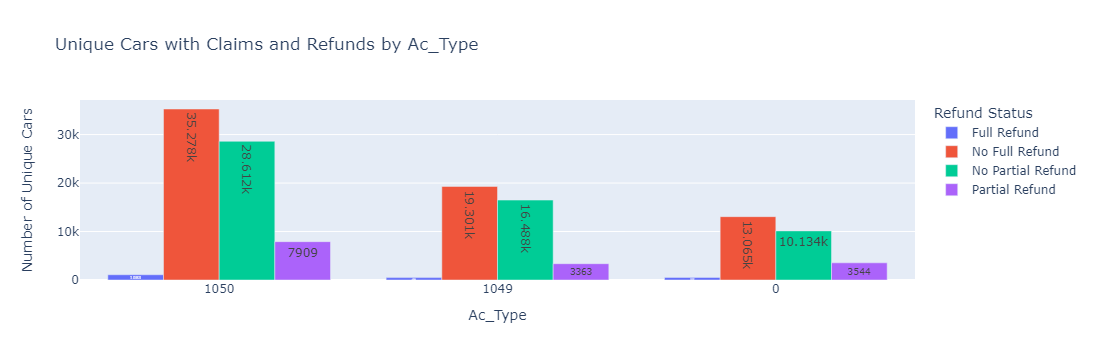

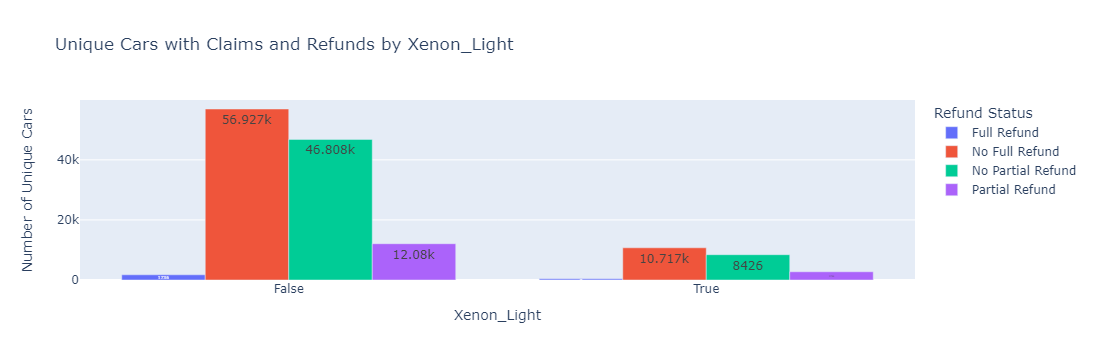

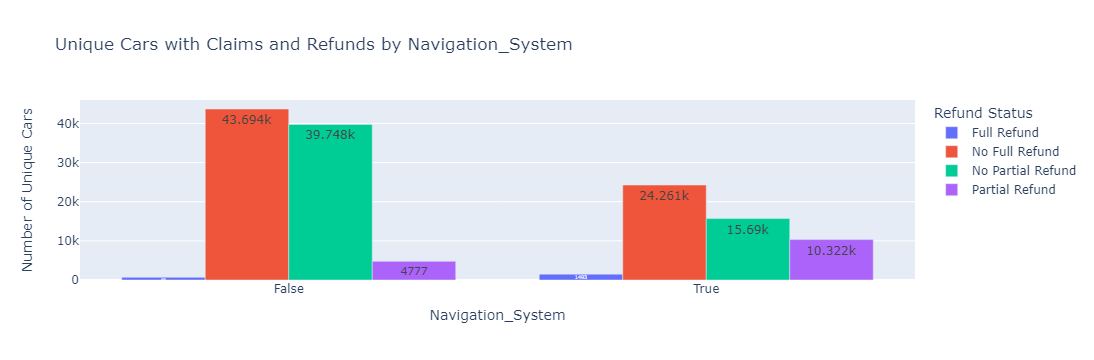

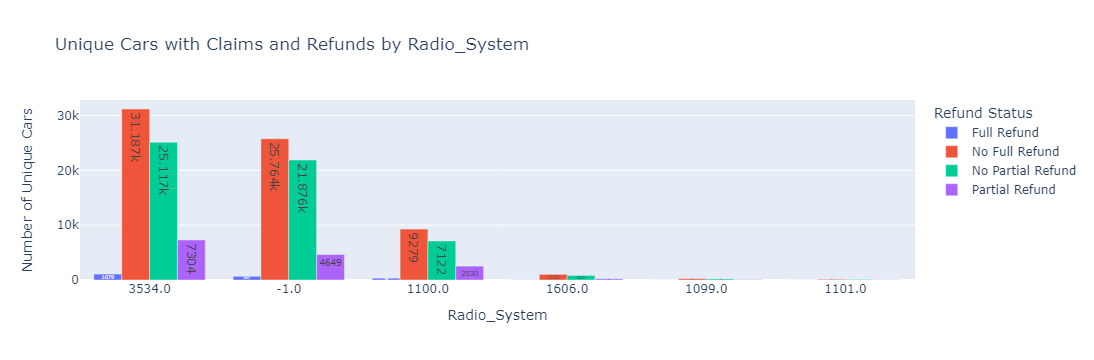

In [18]:
import plotly.express as px
def plot_unique_cars_by_feature(data, feature_name):
    # Convert the feature to string if not already done
    if data[feature_name].dtype != 'O':  # 'O' denotes string/object type in pandas
        data[feature_name + '_str'] = data[feature_name].astype(str)
    feature_str = feature_name + '_str' if data[feature_name].dtype != 'O' else feature_name

    # Melt the DataFrame to long format
    long_format = pd.melt(data, id_vars=['car_id', feature_str], value_vars=['full_refunds_str', 'partial_refunds_str'],
                          var_name='Refund Type', value_name='Refund Status')

    # Filter out the 'No Full Refund' and 'No Partial Refund' rows for clearer visualization
    filtered_long_format = long_format[long_format['Refund Status'].str.contains('Refund')]

    # Group by feature and 'Refund Status', then count unique 'car_id's
    unique_cars_by_feature_and_refund = filtered_long_format.groupby([feature_str, 'Refund Status'])['car_id'].nunique().reset_index(name='Unique Cars Count')

    # Create the histogram using the aggregated data
    fig = px.bar(unique_cars_by_feature_and_refund, x=feature_str, y='Unique Cars Count', color='Refund Status',
                 title=f'Unique Cars with Claims and Refunds by {feature_name.title()}',
                 labels={feature_str: feature_name.title(), 'Unique Cars Count': 'Number of Unique Cars'},
                 barmode='group')
    fig.update_traces(texttemplate='%{y}', textposition='inside')
    fig.update_xaxes(categoryorder='total descending')
    fig.show()

# Plot charts for specified features
features = ['country', 'has_tuning', 'has_airbags',
       'has_alarm_system', 'fuel_type', 'gear_type', 'ac_type', 'xenon_light',
       'navigation_system', 'radio_system']
for feature in features:
    plot_unique_cars_by_feature(data_no_duplicates, feature)


In [15]:
# Calculate claim amount
data_no_duplicates['claim_amount'] = 0  # Initialize the column

# Full refunds: use the sell price
data_no_duplicates.loc[data_no_duplicates['full_refunds'] == True, 'claim_amount'] = data_no_duplicates['sell_price']

# Partial refunds with full_processed claim status: use the voucher amount
condition = (data_no_duplicates['partial_refunds'] == True) & (data_no_duplicates['claim_status'] == 'CLOSED_FULLY_PROCESSED')
data_no_duplicates.loc[condition, 'claim_amount'] = data_no_duplicates['voucher_amount']

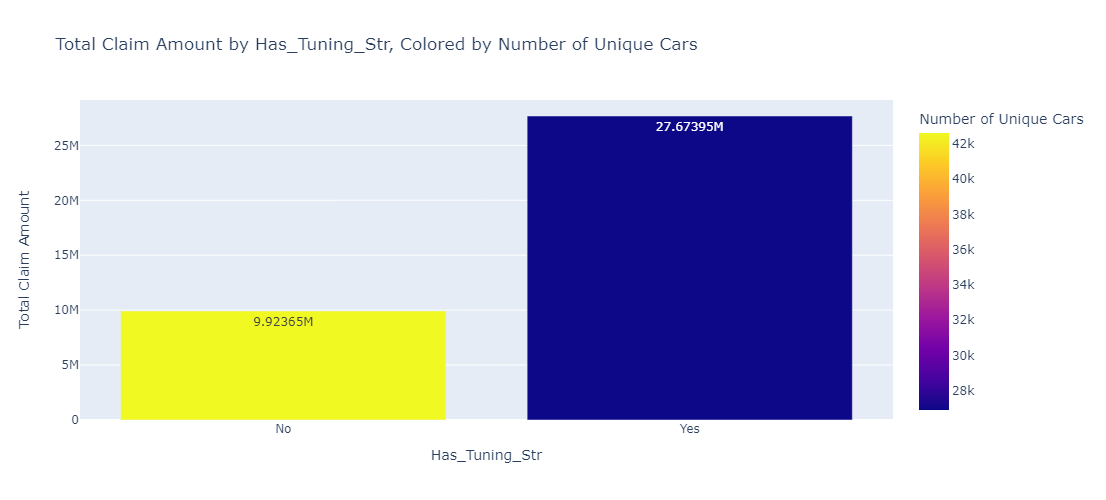

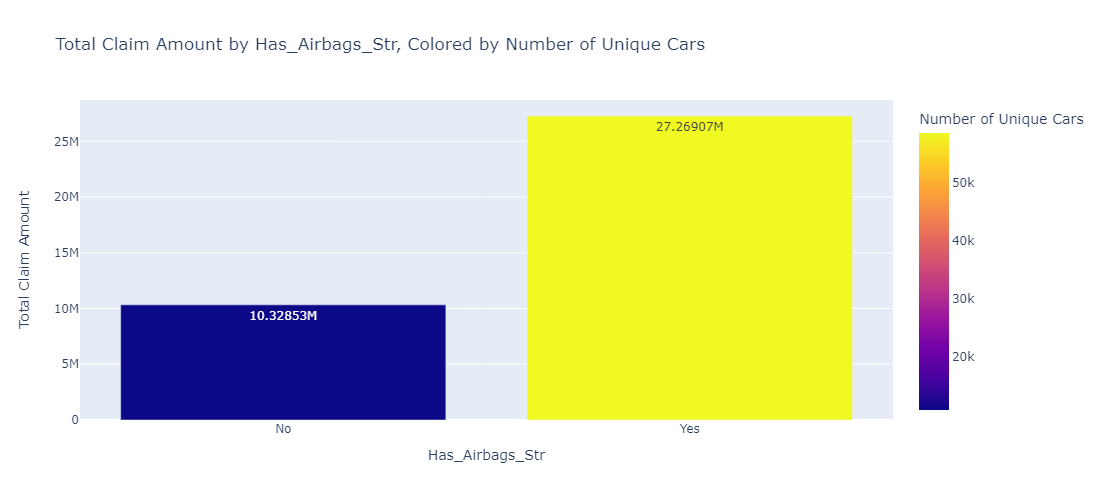

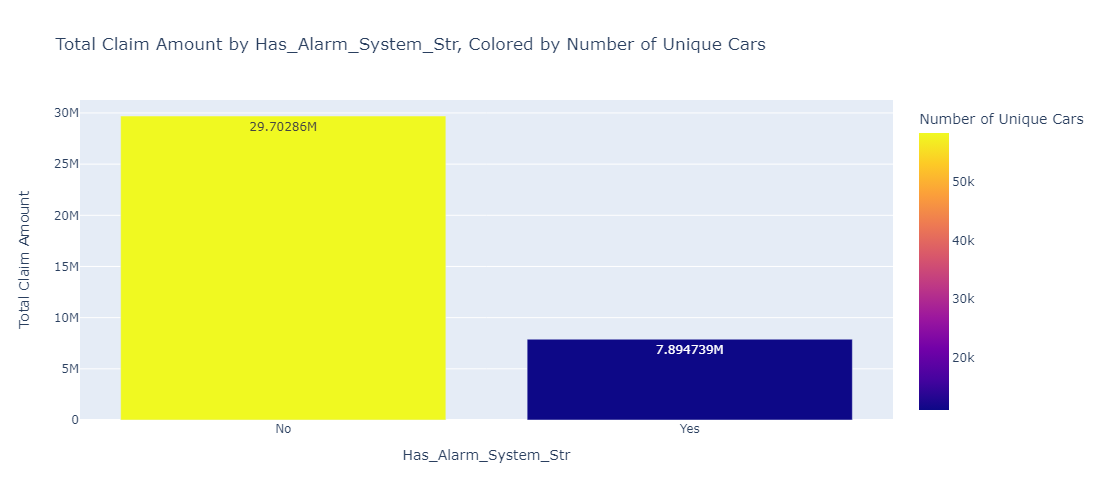

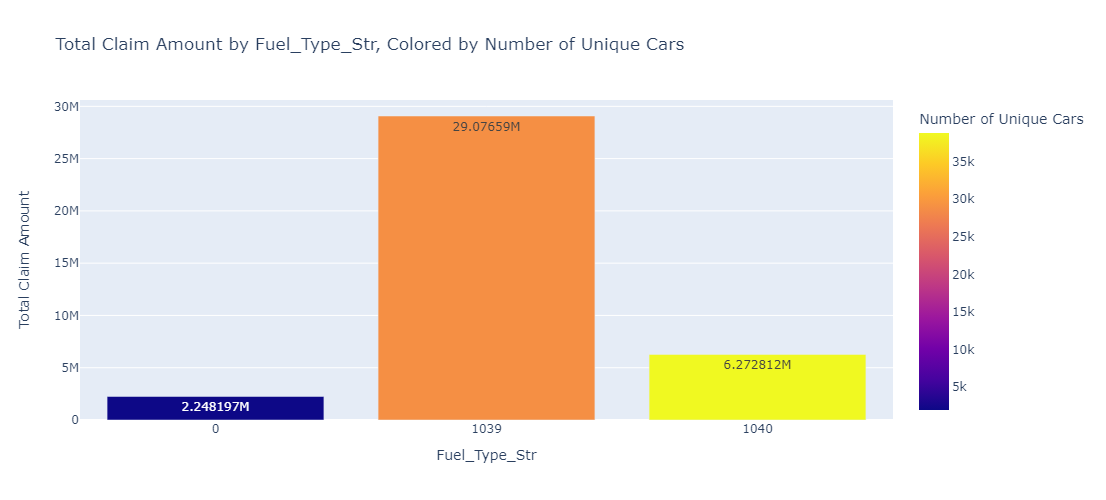

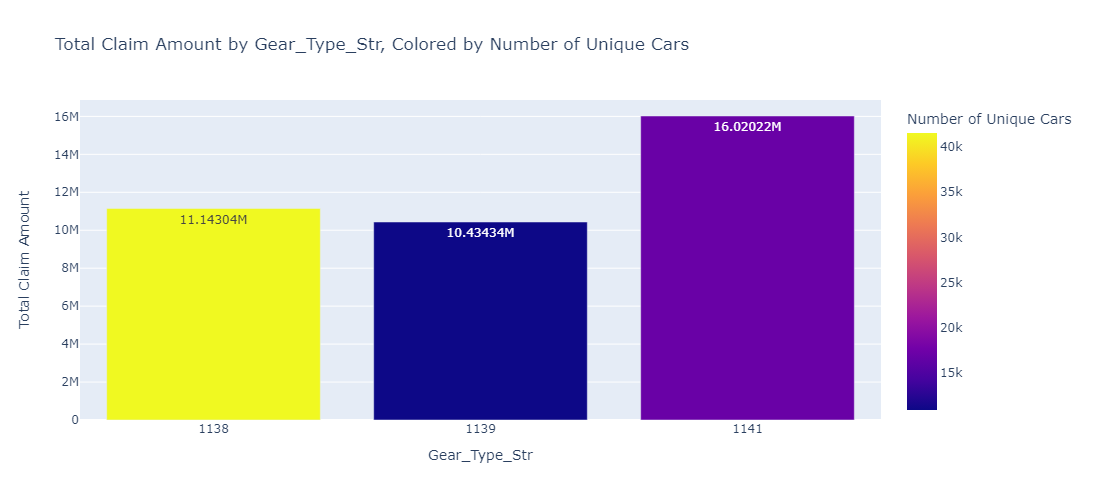

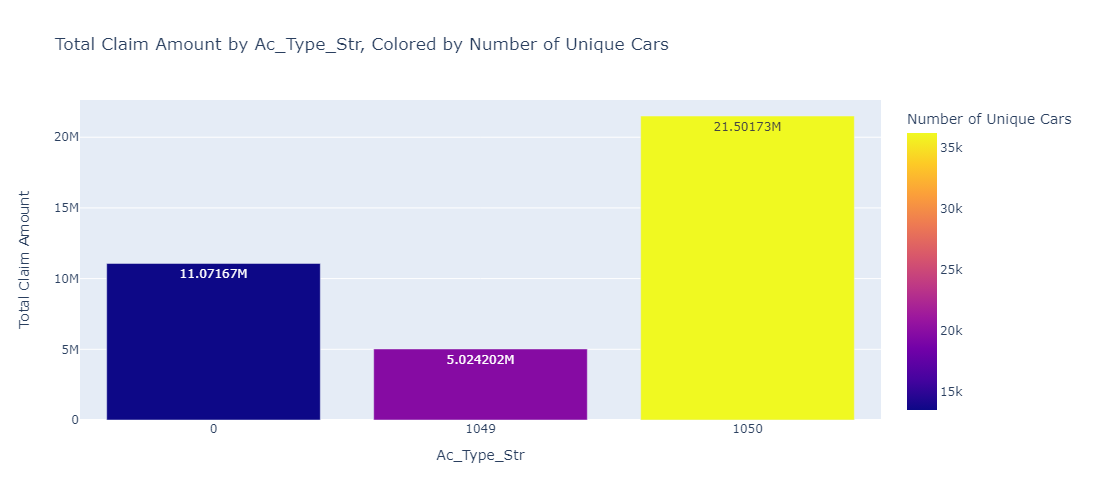

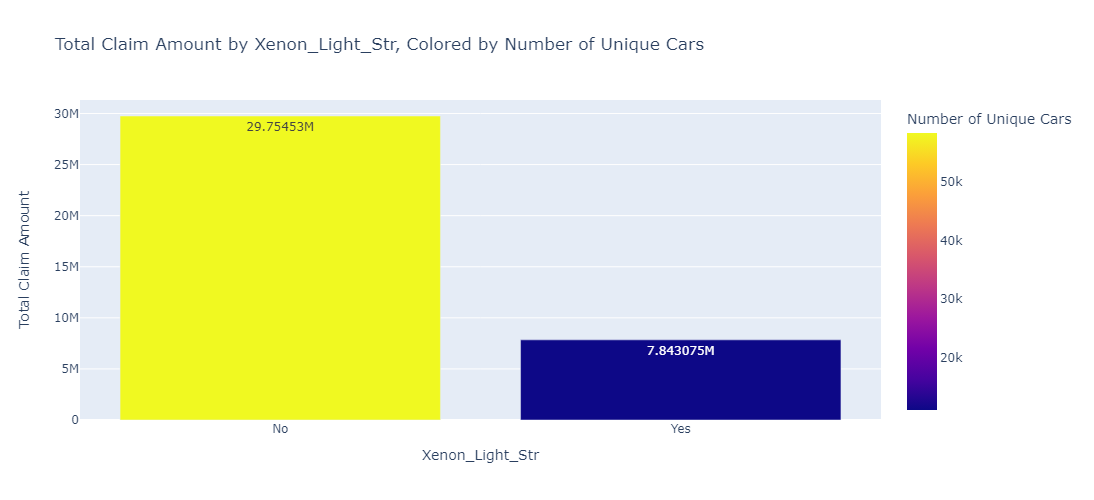

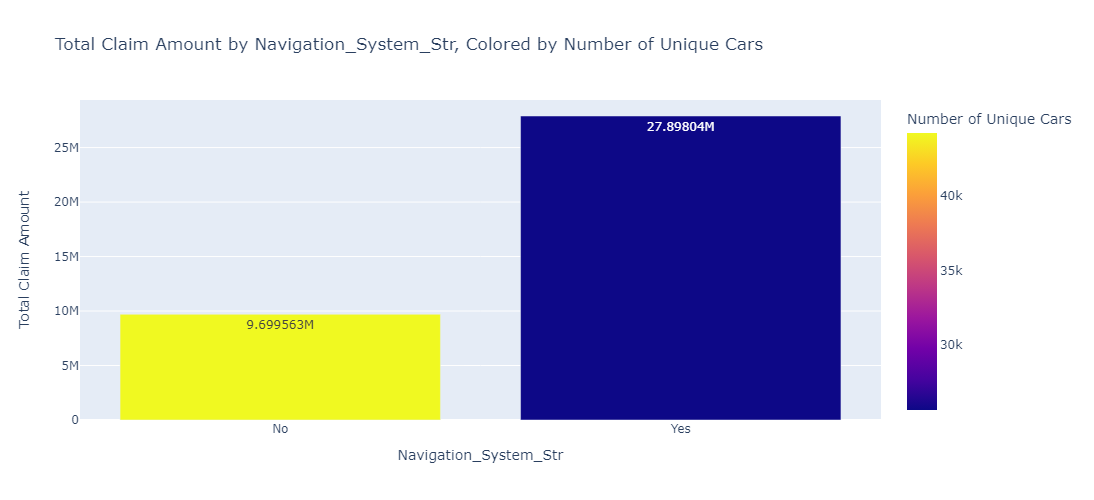

In [16]:
boolean_features = ['has_tuning', 'has_airbags', 'has_alarm_system', 'xenon_light', 'navigation_system']
for feature in boolean_features:
    data_no_duplicates[feature + '_str'] = data_no_duplicates[feature].map({True: 'Yes', False: 'No'})

# Ensure 'fuel_type', 'gear_type', 'ac_type' are in string format for consistency in plotting
data_no_duplicates['fuel_type_str'] = data_no_duplicates['fuel_type'].astype(str)
data_no_duplicates['gear_type_str'] = data_no_duplicates['gear_type'].astype(str)
data_no_duplicates['ac_type_str'] = data_no_duplicates['ac_type'].astype(str)

import plotly.express as px

def plot_claim_amount_by_feature(data, feature_name):
    # Prepare feature name for boolean and categorical features
    if feature_name in boolean_features:
        feature_str = feature_name + '_str'
    elif feature_name in ['fuel_type', 'gear_type', 'ac_type']:
        feature_str = feature_name + '_str'
    else:
        feature_str = feature_name

    # Aggregate data to count unique cars and sum claim amounts by the specified feature
    agg_data = data.groupby(feature_str).agg(
        unique_cars=('car_id', pd.Series.nunique),
        total_claim_amount=('claim_amount', 'sum')
    ).reset_index()

    # Plot
    fig = px.bar(agg_data, x=feature_str, y='total_claim_amount', 
                 color='unique_cars', 
                 title=f'Total Claim Amount by {feature_name.title()}, Colored by Number of Unique Cars',
                 labels={feature_str: feature_name.title(), 'total_claim_amount': 'Total Claim Amount', 'unique_cars': 'Number of Unique Cars'})
    
    # Add the number of unique cars as text on each bar
    fig.update_traces(texttemplate='%{y}', textposition='inside')
    fig.update_layout(height=500)
    fig.show()

# Example usage
features = ['has_tuning_str', 'has_airbags_str', 'has_alarm_system_str', 'fuel_type_str', 'gear_type_str', 'ac_type_str', 'xenon_light_str', 'navigation_system_str']
for feature in features:
    plot_claim_amount_by_feature(data_no_duplicates, feature)




# Insurance Claim Analysis and Recommendations

## Analysis Summary
A detailed analysis of car insurance claims data reveals critical insights into how vehicle features impact claim frequencies and costs. Key findings indicate that vehicles without alarm systems and xenon lights are more prone to higher claims, highlighting a direct correlation between certain vehicle features and the risk of claims. Additionally, vehicles with tuning modifications tend to incur similar costs to those lacking these specific safety features.

## Recommendations for Stakeholders

### Enhancing Vehicle Security
- **Alarm Systems:** Strongly encourage the addition of alarm systems in vehicles that lack them. This could be incentivized through insurance premium discounts for vehicles equipped with advanced security features.
- **Xenon Lights:** Advocate for the inclusion of xenon lights in vehicles, emphasizing their role in improving visibility and reducing accident risk. 

### Insurance Policy Adjustments
- **Tuned Vehicles:** Implement a more nuanced risk assessment for vehicles with tuning modifications, potentially adjusting premiums to reflect the associated risk.
- **Safety Standards:** Promote safety and performance standards for vehicle modifications, offering incentives for adherence.

### Data-Driven Adjustments
- Continuously analyze claims data to identify trends, enabling the adjustment of insurance products and services accordingly. This proactive approach aims to mitigate risks and tailor offerings to meet evolving needs.

By adopting these recommendations, insurers can significantly reduce claim costs, enhance vehicle safety, and improve overall customer satisfaction.
